<center><h1>Module 2 Assignment</h1></center>

Mutiara Nadhifa Nasution

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("COVID-19_Outcomes_by_Testing_Cohorts__Cases__Hospitalizations__and_Deaths.csv")

## Display top 7 rows of the dataframe in your notebook

In [3]:
df.head(7)

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/29/2020,04/17/2020,9979,3386,527,96
1,04/29/2020,02/08/2020,1,0,0,0
2,04/29/2020,03/05/2020,63,5,3,1
3,04/29/2020,04/09/2020,9019,4803,1253,386
4,04/29/2020,04/03/2020,9389,5523,1688,582
5,04/29/2020,03/25/2020,7457,4803,1395,429
6,04/29/2020,03/21/2020,4713,2663,757,231


## Count number of null values (if any) for each column

In [4]:
df.isnull().sum()

extract_date           0
specimen_date          0
Number_tested          0
Number_confirmed       0
Number_hospitalized    0
Number_deaths          0
dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [5]:
df = df[["Number_hospitalized","Number_deaths"]]
df.head()

,Number_hospitalized,Number_deaths
0,527,96
1,0,0
2,3,1
3,1253,386
4,1688,582


## Display the average, median, and standard deviation of each of your numerical columns

In [6]:
df.agg(
    {
        "Number_hospitalized": ["mean", "median", "std"],
        "Number_deaths": ["mean", "median", "std"],
    }
)

,Number_hospitalized,Number_deaths
mean,234.946375,73.940686
median,115.000000,21.000000
std,392.006729,160.110002


## Plot two of the numerical columns one against the other in a scatter plot

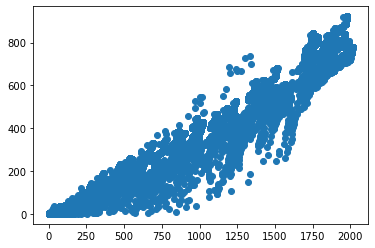

In [7]:

plt.scatter(x=df["Number_hospitalized"], y=df["Number_deaths"])


## Plot the data distribution of all your numerical columns in histogram and boxplot

Text(0.5, 1.0, 'Number deaths')

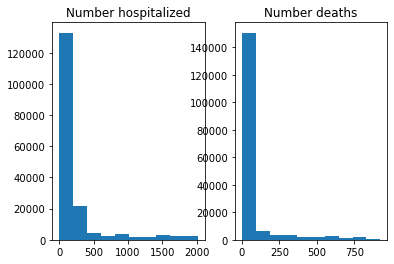

In [8]:
plt.subplot(1, 2, 1)
plt.hist(df["Number_hospitalized"])
plt.title("Number hospitalized")
            
plt.subplot(1, 2, 2)
plt.hist(df["Number_deaths"])
plt.title("Number deaths")

{'whiskers': [<matplotlib.lines.Line2D at 0x2271c782430>,
 'caps': [<matplotlib.lines.Line2D at 0x2271c782af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2271c7820d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2271c78b1f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2271c78b550>,
 'means': []}

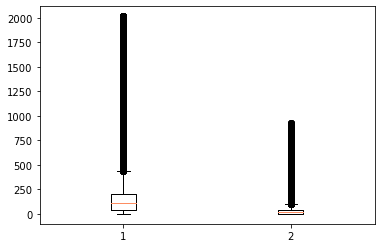

In [71]:
databox = [df["Number_hospitalized"],df["Number_deaths"]]
plt.boxplot(databox)

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [10]:
df["Number_hospitalized_raised_two"] = df["Number_hospitalized"]**2
df["Number_deaths_raised_two"] = df["Number_deaths"]**2
df = df[["Number_hospitalized","Number_hospitalized_raised_two","Number_deaths","Number_deaths_raised_two"]]
df.head()

,Number_hospitalized,Number_hospitalized_raised_two,Number_deaths,Number_deaths_raised_two
0,527,277729,96,9216
1,0,0,0,0
2,3,9,1,1
3,1253,1570009,386,148996
4,1688,2849344,582,338724


# Citi Bike investigation

>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [11]:
cb = pd.read_csv("201709-citibike-tripdata.csv")
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1


## Count the number of missing values of each column

In [12]:
cb.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 207468
gender                          0
dtype: int64

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

In [13]:
rider = cb[["usertype","birth year","gender"]]
rider.head()

,usertype,birth year,gender
0,Subscriber,1993.0,1
1,Subscriber,1988.0,1
2,Subscriber,1969.0,1
3,Subscriber,1993.0,1
4,Subscriber,1987.0,1


Text(0.5, 0, 'Usertype')

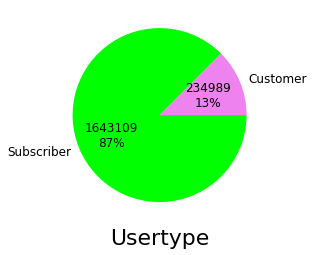

In [14]:
def label_function(val):
    return f'{val / 100 * len(rider):.0f}\n{val:.0f}%'

utype = rider.groupby('usertype').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12},
                                 colors=['violet', 'lime'],label="")
utype.set_xlabel('Usertype', size=22)

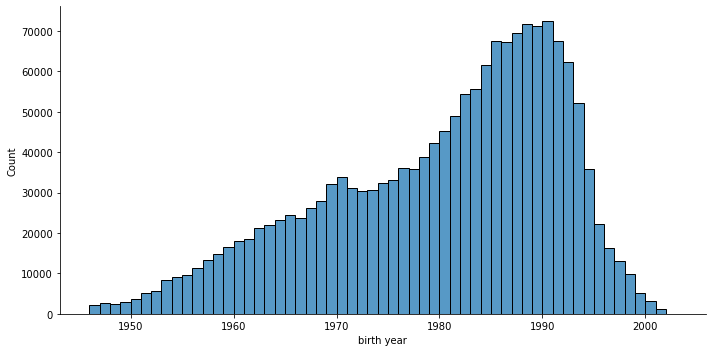

In [15]:
import seaborn as sns
sns.displot(data=rider, x="birth year" , bins=range(1946,2004),  aspect=10/5) ;

In [16]:
rider = rider.drop(rider[rider.gender == 0].index)
rider.head()

,usertype,birth year,gender
0,Subscriber,1993.0,1
1,Subscriber,1988.0,1
2,Subscriber,1969.0,1
3,Subscriber,1993.0,1
4,Subscriber,1987.0,1


In [17]:
rider['age'] = (2017 - rider['birth year'])
rider.head()

,usertype,birth year,gender,age
0,Subscriber,1993.0,1,24.0
1,Subscriber,1988.0,1,29.0
2,Subscriber,1969.0,1,48.0
3,Subscriber,1993.0,1,24.0
4,Subscriber,1987.0,1,30.0


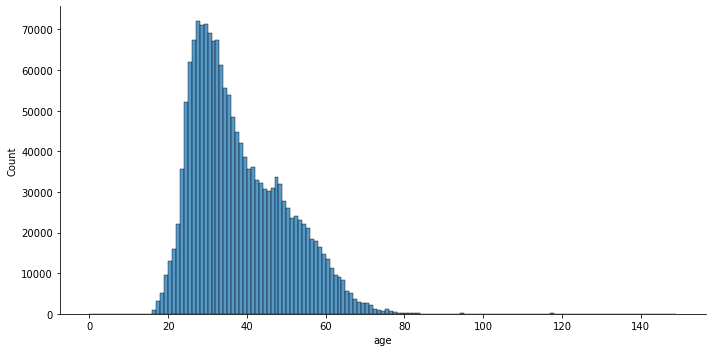

In [18]:

sns.displot(data=rider, x="age" , bins=range(0,150),  aspect=10/5) ;

Text(0.5, 0, 'Per gender')

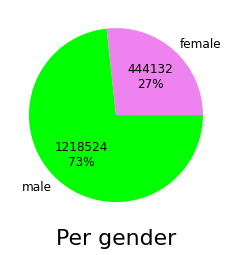

In [19]:
rider.loc[(rider['gender'] == 1, 'gender')] = "male"  
rider.loc[(rider['gender'] == 2, 'gender')] = "female"  

def label_function(val):
    return f'{val / 100 * len(rider):.0f}\n{val:.0f}%'

gd = rider.groupby('gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12},
                                 colors=['violet', 'lime'],label="")
gd.set_xlabel('Per gender', size=22)

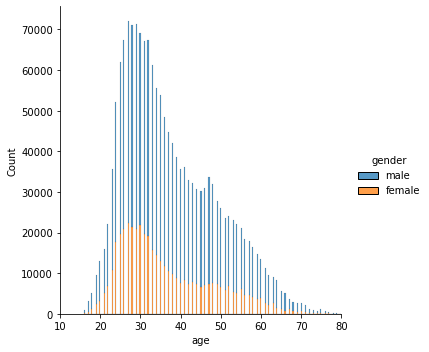

In [20]:
ax = sns.displot(data=rider, x='age', hue='gender', multiple='stack')
ax.set(xlim=(10, 80))

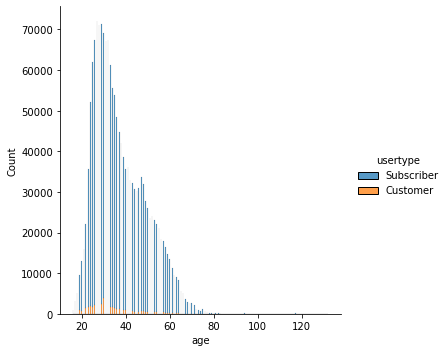

In [21]:
ut = sns.displot(data=rider, x='age', hue='usertype', multiple='stack')

## What is the average number of trips per day?

In [22]:
cb['starttime'] = pd.to_datetime(cb['starttime'])
cb['stoptime'] = pd.to_datetime(cb['stoptime'])
cb['start day']=cb['starttime'].dt.day.astype('category') 
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start day
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1,1
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1,1
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1,1
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1,1
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1,1


In [23]:
perday = cb.groupby(['start day']).size()
perday

start day
1     54881
2     37812
3     30955
4     55285
5     65445
6     42295
7     69519
8     69574
9     60155
10    60711
11    71917
12    74580
13    69566
14    72071
15    72297
16    61036
17    59967
18    64130
19    57910
20    71150
21    67742
22    70127
23    62687
24    57458
25    69200
26    71518
27    69897
28    70883
29    67177
30    50153
dtype: int64

In [24]:
perday.mean()

62603.26666666667

## What is the average trip duration?

In [25]:
cb.tripduration.mean()

997.0888920599458

## What days of the week are most rides taken on?
Process the data and plot your answer

In [26]:
cb['weekday']=cb['starttime'].dt.weekday.astype('category') # 0 = monday
cb['weekday'].tail()


1878093    5
1878094    5
1878095    5
1878096    5
1878097    5
Name: weekday, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

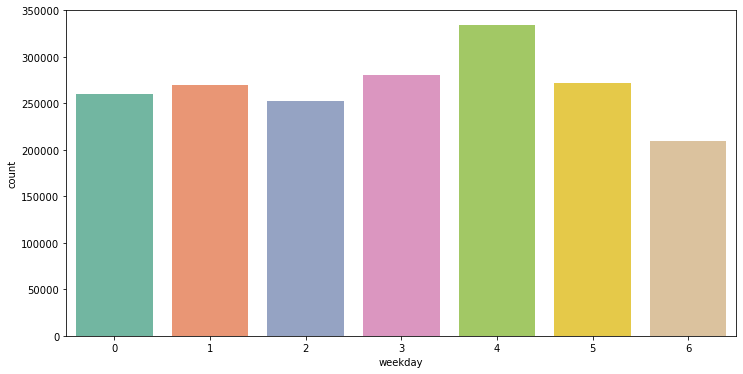

In [27]:
plt.figure(figsize=(12,6))
sns.set_palette("Set2")
sns.countplot(data=cb,x="weekday", dodge=False) ;

## What hour of the day are most rides taken on?
Process the data and plot your answer

<AxesSubplot:xlabel='start hour', ylabel='count'>

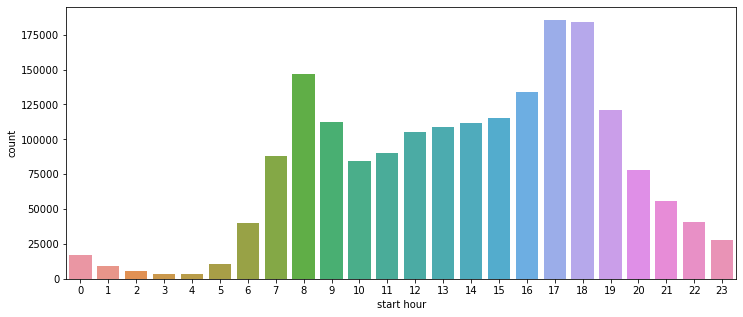

In [28]:
cb['start hour']=cb['starttime'].dt.hour.astype('category')
plt.figure(figsize=(12,5))
sns.countplot(data=cb, x="start hour" ) 

## Is there correlation between age and trip duration?

In [29]:
cb['age'] = (2017 - cb['birth year'])
cb = cb.drop(cb[cb.age > 85].index)
ad = cb.groupby('age')['tripduration'].mean().sort_values(ascending=False)
ad

age
30.0    1785.729071
80.0    1235.157895
18.0    1057.430000
22.0    1008.082125
81.0     977.826531
           ...     
83.0     765.454545
72.0     735.348544
77.0     732.549898
79.0     703.820144
85.0     358.937500
Name: tripduration, Length: 70, dtype: float64

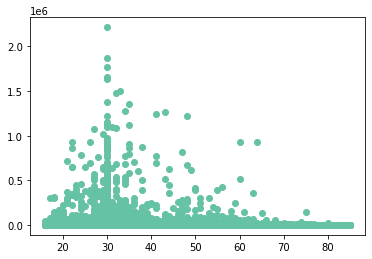

In [30]:
plt.scatter(cb['age'],cb['tripduration'])

<BarContainer object of 70 artists>

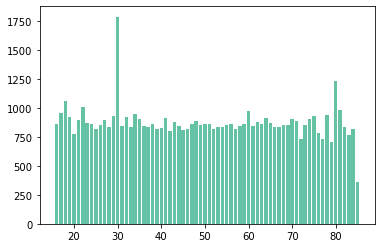

In [31]:
plt.bar(ad.index, ad)

In [32]:
cb['age'].corr(cb['tripduration'])

-0.004224483743548082

There is no correlation between age and trip duration.

## What are the top 10 pair of stations that our riders use as a start & stopping point?

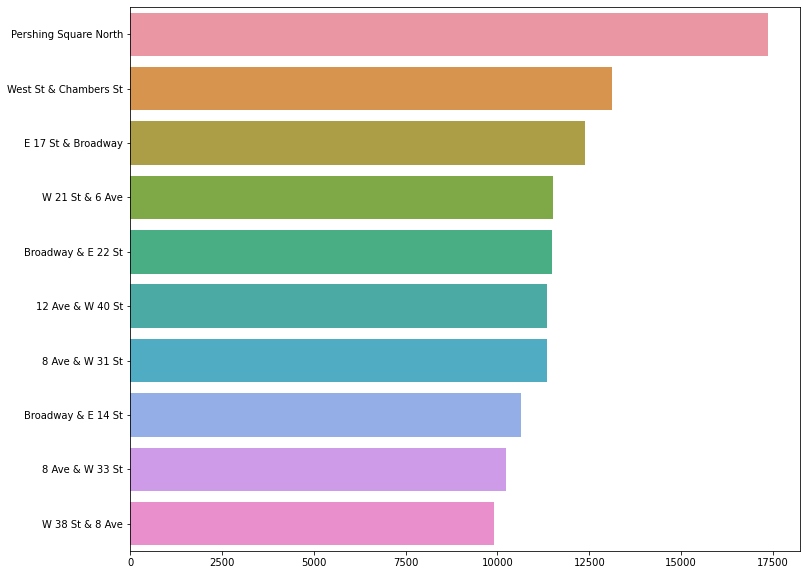

In [33]:
startstation = cb['start station name'].value_counts()[:10]
plt.figure(figsize=(12,10))
sns.barplot( x=startstation.values , y=list(startstation.index), 
 orient="h"  ) ;

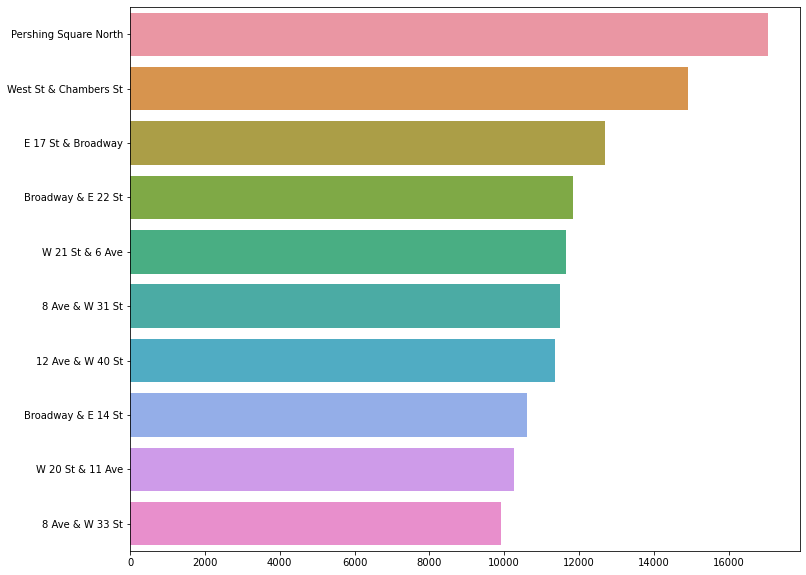

In [34]:
endstation = cb['end station name'].value_counts()[:10]
plt.figure(figsize=(12,10))
sns.barplot( x=endstation.values , y=list(endstation.index), 
 orient="h"  ) ;

## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



### "Citi Bike is also gets used for recreational purposes aside from transportation"
Hypothesis: A lot of trips start and end at the same station.

## Work with your dataset and show your findings to help answer your question

In [56]:
trips_cb = cb.groupby(['start station name','end station name']).size().reset_index(name = 'Number of Trips')
trips_cb['trip'] = trips_cb['start station name'] + ' to ' + trips_cb['end station name']
trips_cb = trips_cb[['trip','Number of Trips']].sort_values(by=['Number of Trips'], ascending=False).nlargest(10, 'Number of Trips')
trips_cb

,trip,Number of Trips
38399,Central Park S & 6 Ave to Central Park S & 6 Ave,856
4817,12 Ave & W 40 St to West St & Chambers St,781
74990,E 7 St & Avenue A to Cooper Square & E 7 St,770
38351,Central Park S & 6 Ave to 5 Ave & E 88 St,701
88763,Grand Army Plaza & Central Park S to Grand Arm...,578
161940,West St & Chambers St to 12 Ave & W 40 St,562
127774,Soissons Landing to Soissons Landing,560
118787,Picnic Point to Soissons Landing,558
119146,Pier 40 - Hudson River Park to West St & Chamb...,549
4695,12 Ave & W 40 St to Pier 40 - Hudson River Park,538


<AxesSubplot:xlabel='Number of Trips', ylabel='trip'>

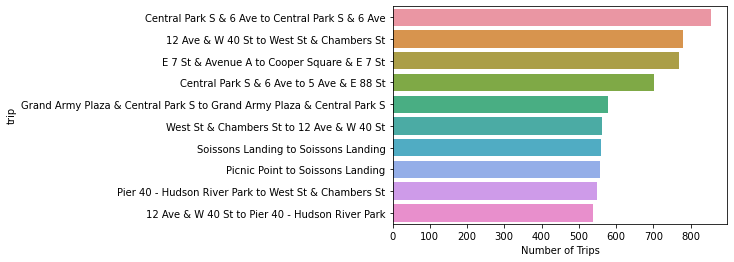

In [59]:
sns.barplot(data = trips_cb, y='trip', x='Number of Trips', orient="h")

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```